# Classification MNIST
in MNIST dataset, set of 70,000 small image of digits handwritten.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [50]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [51]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [52]:
import numpy as np
import matplotlib.pylab as plt

In [5]:
y[0]

'5'

In [53]:
X = np.array(X)
y = np.array(y, dtype=np.uint8)  #dtype=np.uint8 change to integer

In [7]:
X[0].shape

(784,)

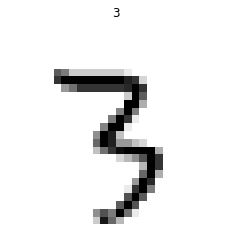

In [8]:
plt.imshow(X[44].reshape(28,28), cmap='binary')
plt.title(y[44])
plt.axis('off')
plt.show()

Normalized data (between 0 and 1)

In [32]:
print(X[0].max())
X = X/255
print(X[0].max())

255.0
1.0


Spilt datasets

In [54]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### JUST Training a Binary Classifier
* number 5 and not-5
* set labels betwwen True and False then *1 for 1 and 0

In [11]:
(y_train == 5)*1

array([1, 0, 0, ..., 1, 0, 0])

In [12]:
y_train_5 = (y_train == 5)*1
y_test_5 = (y_test == 5)*1
y_train_5[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent (SGD)**, this classifier has advantage of being capable of handling very large datasets efficienly.

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

### expand_dims()

if we predict a single value the model what 2D array , we must change x_test[index] to 2D array

In [14]:
x_test[0].ndim

1

In [15]:
np.expand_dims(x_test[0], axis=0).ndim

2

In [16]:
z = np.array([[1,4,3],[2,3,4]])
print(z,'\n')
print(np.expand_dims(z, axis=(0)),'\n')
print(np.expand_dims(z, axis=1))

[[1 4 3]
 [2 3 4]] 

[[[1 4 3]
  [2 3 4]]] 

[[[1 4 3]]

 [[2 3 4]]]


In [17]:
sgd_clf.predict(np.expand_dims(x_test[0], axis=0))

array([0])

In [18]:
pred_5 = sgd_clf.predict(x_test)
pred_5[:1000:20] == y_test_5[:1000:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Performance Measure
* using Cross-Validation
* Confusion Matrix

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_test, y_test_5, cv=3, scoring='accuracy')

array([0.95110978, 0.9639964 , 0.97329733])

Confusion Matrix from train set by using *Cross val predict* because it's return prediction classes and we don't want to touch test set *remember test set must be on the last moodel*

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53613,   966],
       [  840,  4581]], dtype=int64)

<AxesSubplot:>

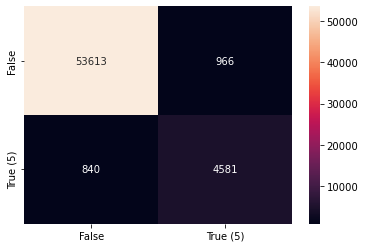

In [22]:
import seaborn as sn
import pandas as pd

cm_df = pd.DataFrame(cm,columns=['False','True (5)'],index=['False','True (5)'])
sn.heatmap(cm_df,annot=True,fmt='d')

> each row represents a n acctual class, while each column represents a predict class

> 1st row considers non-5 (the negative class):53613 of them correctly called **True Negative** , while the remaining 966 were wrong class as 5 **False Positive**

> 2nd row considers 5-class (the positive class):840 were wrong class called **False Negative** , and 4581 remaining were correctly as 5s **True Positive** 

### Precision/Recall

The confusion matrix give a lot of information, but sometimes you may prefer a more concise metrix, called **Precision of the classifier**

**precision** = TP / (TP + FP)

precision = 100% if don't have False Positive


**recall** = TP / (TP + FN)

recall or sensitivity or true positive rate (TPR) 

In [23]:
from sklearn.metrics import precision_score, recall_score

print('precision :',precision_score(y_train_5, y_train_pred))
print('recall :',recall_score(y_train_5, y_train_pred))

precision : 0.8258518117901569
recall : 0.8450470392916436


>Precision: how many of the returned hits were true positive i.e. how many of the found were correct hits. >> 82%

> Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. >> 84%


it's often convenient to combine precision and recall into single metric called **F1 Score** , the F1 score high if precision and recall are high.

F1 = 2(pr*re)/(pr+re)

You can have a precision of 1 (so when you say it's positive, it's actutally positive) but still have a very low recall (you predicted 3 good positives but forgot 15 others). Or you can have a good recall and a bad precision.
then using F1 score to check it

In [24]:
from sklearn.metrics import f1_score

print('F1 score :',f1_score(y_train_5, y_train_pred))

F1 score : 0.8353391684901532


but F1 score does not everything, some contexts you mostly care about precision, and other contexts you really care about recall.

for examples: 
* if you detect video are safe for kids, you must keep only safe one i.e. high precision. 
* on the other hand suppose to detect shoplifters in surveillance images, it's must high recall (the security will get few false alerts but almost all shoplifters will get caught) 

**Precision/Recall Trad-off** : If you increase precision, it will reduce recall and vice versa.

y_score: [1.36162725] predict: [1]


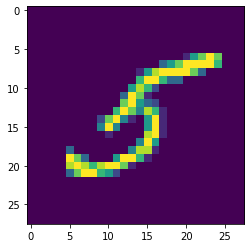

In [25]:
index = 35
y_scores = sgd_clf.decision_function([x_train[index]])
plt.imshow(x_train[index].reshape(28,28))
print('y_score:',y_scores,'predict:', sgd_clf.predict([x_train[index]]))

> *Decision function* returns array of shape (n_samples, n_classes) with filled confidence score, which is basically a signed distance of sample from hyperplane of your model.

In [26]:
threshold = 1
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')
y_scores

array([ 1.65073246, -5.94781643, -8.22853161, ...,  2.62249961,
       -2.09502974, -2.54393863])

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print('precision:',precisions[:3],'\nrecalls:',recalls[:3],'\nthresholds:',thresholds[:3])

precision: [0.09080706 0.09079183 0.09079335] 
recalls: [1.         0.99981553 0.99981553] 
thresholds: [-17.5511157  -17.54794245 -17.54281162]


In [29]:
precisions[:-1].shape, recalls[:-1].shape, thresholds.shape

((59698,), (59698,), (59698,))

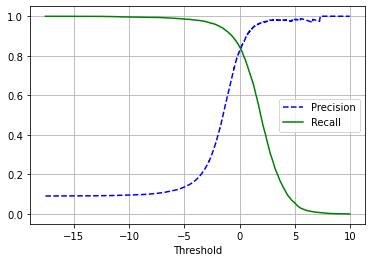

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.grid()
    plt.legend()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

> when we set thresholds high precision will increase and recalls going down

In [31]:
precisions >= .9

array([False, False, False, ...,  True,  True,  True])

In [32]:
np.argmax(precisions >= .9)

55102

In [33]:
precisions[55101]

0.8999347400478573

In [34]:
threshold_90_precision = thresholds[np.argmax(precisions >= .9)]
threshold_90_precision # thresholds that get 90 precision

0.6060137354660038

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)*1
y_train_pred_90

array([1, 0, 0, ..., 1, 0, 0])

In [36]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9001305483028721
0.7631433314886552


> you have a 90% precision classifier!, but wait a high-precision not useful if its recall is too low!

if someone says, "Let's reach 99% precision,"you shold ask,"At what recall?"

### The ROC curve

The receiver operating characteristic : another common tool used with binary classifiers. similar to precision/recall but *plot TPR(anoter name for recall) vs false positive rate (FPR)*

ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them

In [37]:
from sklearn.metrics import roc_curve

FPR, TPR , thresholds = roc_curve(y_train_5, y_scores)

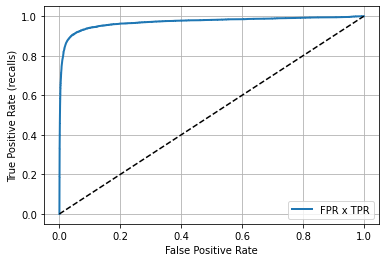

In [38]:
def plot_roc_curve(FPR,TPR,label=None) :
    plt.plot(FPR, TPR, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (recalls)')
    plt.grid()
    plt.legend()

plot_roc_curve(FPR,TPR,'FPR x TPR')

> *area under the curve (AUC)* .a perfect classifier will have a ROC AUC equal to 1 

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9704522882419195

> how to decied which one to use. you should prefer the PR curve whenever when you care about *False Positive* . other wise use ROC curve

Use RandomForestClassifier to compare with SGDClassifier, but it does not have a decision_function(). instead it has a *predict_proba()* 

**Predict Proba** : retuen probability that the given instance belongs to the given class (e.g., 80% chance that represent a 5)

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [41]:
y_probas_forest[:,1] # sure it 5

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [42]:
y_scores_forest = y_probas_forest[:,1]
FPR_forest, TPR_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

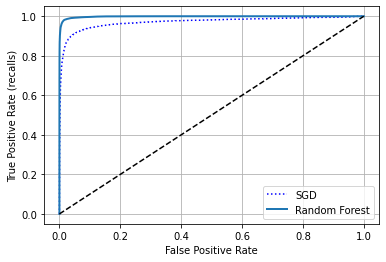

In [43]:
plt.plot(FPR, TPR, 'b:', label='SGD')
plot_roc_curve(FPR_forest, TPR_forest, 'Random Forest')
plt.legend()
plt.show()

> as you can see RandomForest's ROC curve looks better than SGD's : it come closer to the top-left corner

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983400347444625

In [45]:
y_train_5, y_scores_forest

(array([1, 0, 0, ..., 1, 0, 0]),
 array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06]))

In [46]:
print('Pecision forest:',precision_score(y_train_5,y_scores_forest.round()))
print('Recall forest:',recall_score(y_train_5,y_scores_forest.round()))

Pecision forest: 0.9905083315756169
Recall forest: 0.8662608374838591


> 99% precision and 86% recall , Not too bad!

## Multiclass Classification

Logistic Regrssion cl, Random Forest cl, naive Bayes cl are capable of handling multiple classes natively.

have 10 classes of image to train 10 binart classifier and select the highest score. this is called the *one-versus-the-res (OvR)* strategy (also called one-versus-all)

another stategy is to train binary classifier for every pair of digits:0s and 1s, 0s and 2s, 1s and 2s, and so on this is called *one-versus-one (OvO)* strategy. you wlii train N*(N-1)/2 times if have N classes

In [47]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train,y_train)
svm_clf.predict([x_test[12]])

array([9], dtype=uint8)

In [48]:
y_test[12]

9

> under the hood, Scikit-Learn actually used the OvO strategy: it train 45 binary classifiers, got their decision sscores for the image, and selected the class that won the most duels.

In [49]:
some_digit_scores = svm_clf.decision_function([x_test[12]])
some_digit_scores

array([[ 1.70901642, -0.30875332,  2.72613485,  5.12738826,  8.29913769,
         4.80115581,  0.69848667,  7.28801973,  5.21585844,  9.3152483 ]])

In [55]:
np.argmax(some_digit_scores), svm_clf.classes_

(9, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

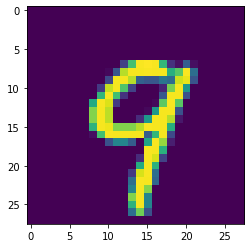

In [52]:
plt.imshow(x_test[12].reshape(28,28));

if you want to force to use OvR or OvO it's simply
* OneVsRestClassifier
* OneVsOneClassifier

In [56]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [57]:
ovr_clf.predict([x_test[12]])

array([9], dtype=uint8)

In [60]:
some_digit_ovr = ovr_clf.decision_function([x_test[12]])
some_digit_ovr

array([[-2.60820475, -3.09580555, -2.65879979, -1.55235189, -1.53312881,
        -2.19611651, -3.3470251 , -1.93431147, -2.02584848,  1.48961706]])

In [65]:
np.argmax(some_digit_ovr), ovr_clf.classes_

(9, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Training an SGDClassifier is just as easy

In [69]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([x_test[12]])

array([9], dtype=uint8)

> this time Scikit-Learn used the OvR strategy

In [70]:
sgd_clf.decision_function([x_test[12]])

array([[ -8.12730898, -11.88107109,  -6.46080517,  -4.39046016,
         -2.96234373,  -3.77821801,  -7.64083916,  -2.49099509,
         -5.11510566,   1.48092261]])

> you can see that the classifier is fairly confident about its prediciton: all score are negative except 9s but can assume the 7s is close to 9s becuse score are is top2

In [71]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.90905, 0.90645, 0.91525])

> accuracy above 90% but how can we improve? . using *StrandardScaler*

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [89]:
x_train[0][340:380]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04313725, 0.74509804, 0.99215686,
       0.2745098 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1372549 , 0.94509804, 0.88235294, 0.62745098])

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_train_scaled[0][340:380]

array([-0.1273685 , -0.22614336, -0.35220291, -0.50758351, -0.67944964,
       -0.82825105, -0.88883004, -0.74022511,  1.06068287,  1.68492907,
       -0.17757569, -0.91768349, -1.02909594, -1.058279  , -0.96567404,
       -0.79447676, -0.61674936, -0.47007288, -0.35512441, -0.25540754,
       -0.15382451, -0.05245428, -0.02150587, -0.00992198, -0.00408252,
       -0.01093439, -0.0255448 , -0.05707308, -0.12466202, -0.23849817,
       -0.3732589 , -0.53313607, -0.70209414, -0.83745005, -0.88007425,
       -0.84101427, -0.48769493,  1.32485786,  0.99837547,  0.32281427])

In [91]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

> ahh yeah sometimes 

> I know this will increase the accuracy, if the data is not normallize yet.

## Error Analysis

In [92]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5697,    2,   32,   20,   18,   59,   39,   15,   38,    3],
       [   2, 6506,   50,   29,    7,   39,   10,   15,   70,   14],
       [  31,   43, 5350,  103,   83,   38,   60,   86,  140,   24],
       [  21,   27,  206, 5405,   10,  200,   28,   65,   97,   72],
       [  13,   17,   28,   17, 5436,   14,   48,   15,   41,  213],
       [  48,   17,   53,  206,   80, 4740,   89,   24,   94,   70],
       [  38,   14,   48,    5,   40,  125, 5619,    4,   22,    3],
       [  18,   19,   69,   17,   87,   13,    3, 5844,   13,  182],
       [  47,  110,  114,  216,   66,  263,   57,   36, 4808,  134],
       [  30,   15,   23,  114,  219,   61,    1,  227,   49, 5210]],
      dtype=int64)

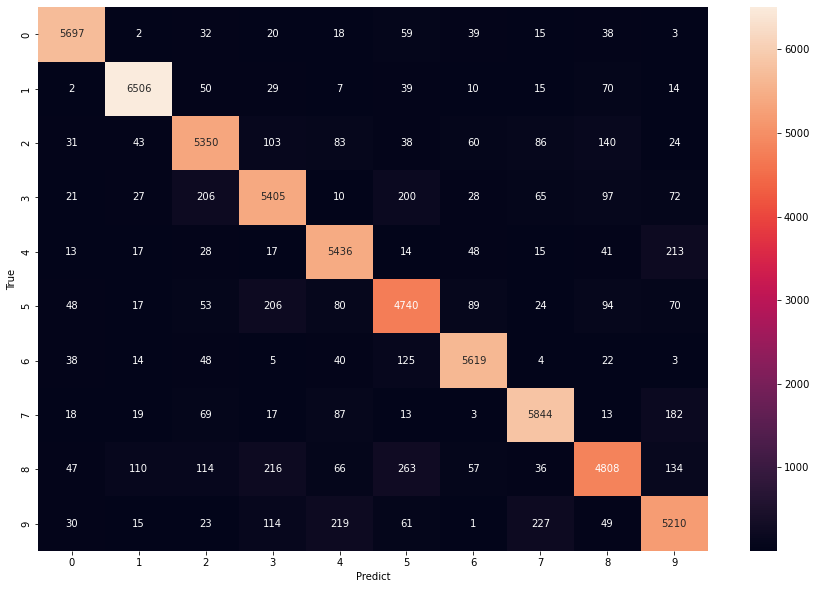

In [142]:
def plot_conf_mx(conf_mx,fmt):
    cm_df = pd.DataFrame(conf_mx,columns=sgd_clf.classes_,index=sgd_clf.classes_)
    plt.figure(figsize=(15,10))
    sn.heatmap(cm_df,annot=True,fmt=fmt);
    plt.ylabel('True')
    plt.xlabel('Predict')
    plt.show()

plot_conf_mx(conf_mx,'d')

percentage confusion matrix

In [122]:
conf_mx.sum(axis=1, keepdims=0)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [123]:
row_sums = conf_mx.sum(axis=1, keepdims=1)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

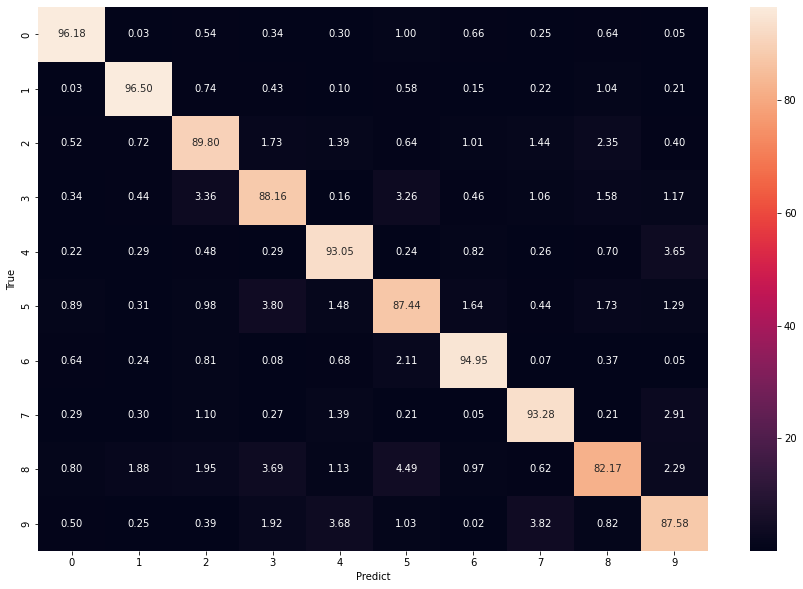

In [149]:
percent_cm = (conf_mx / row_sums)*100

plot_conf_mx(percent_cm,fmt='.2f')

Until now each instance has always been assigned to just one class. Consider a face-recognition: it shold attach tag for person in the same photo such as : Alice, bob, charlie will return output [1,0,1] mean no Bob 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)*1
y_train_odd = (y_train %2 == 1)*1
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[0, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [1, 0]])

> numpy. c_ = <numpy.lib.index_tricks.CClass object> Translates slice objects to concatenation along the second axis. 

using KNeighborsClassifier which support multilabel classification

In [9]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [159]:
knn_clf.predict([x_train[12]]) # < 7 and odd

array([[0, 1]])

In [161]:
y_train[12]

3

there are many ways to evaluate a multilabel classifier, and selecting the right metric depends on your project. One approach is to measure the F1 score, this will compute the average scire for all labels

In [162]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel)
y_train_knn_pred

array([[0, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [1, 0]])

Macro F1-score (short for macro-averaged F1 score) is used to assess the quality of problems with multiple binary labels or multiple classes.

In [167]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.977511478985599

> this assume that all labels are equally important. In particular if you have many more picture of Alice than Bob or Charlie, you may want to give more weight to the score on pictures of Alice to do this use *average = 'weighted'*

## Multioutput Classification

let's build a system that removes noise from images. Notice that the classifier's output is multilabel(1 label per pixel)

the data original work, but normalize data won't work

In [64]:
X, y = mnist['data'], mnist['target']

X = np.array(X)
y = np.array(y, dtype=np.uint8)  #dtype=np.uint8 change to integer
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [65]:
noise = np.random.randint(0,100, (len(x_train), 784)) 
x_train_mod = x_train + noise
noise = np.random.randint(0,100, (len(x_test), 784)) 
x_test_mod = x_test + noise

y_train_mod = x_train
y_test_mod = x_test

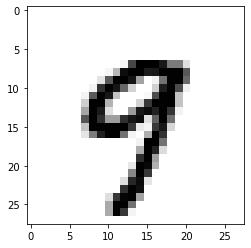

In [66]:
plt.imshow(y_train_mod[45].reshape(28,28),cmap='binary')

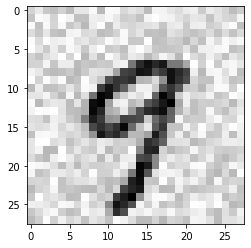

In [67]:
plt.imshow(x_train_mod[45].reshape(28,28),cmap='binary')

In [69]:
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[120]])

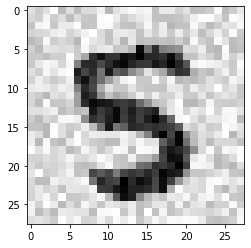

In [72]:
plt.imshow(x_test_mod[120].reshape(28,28), cmap='binary');

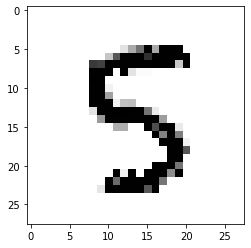

In [73]:
plt.imshow(clean_digit.reshape(28,28),cmap='binary');